# Deep Learning Project



## 1. Boston 주택 가격 예측 모델
- 보스턴 시의 주택 가격에 대한 데이터셋
- 주택의 여러 요건들과 가격 정보가 포함
- 회귀분석에 자주 사용되는 대표적인 데이터셋
___
**데이터셋의 feature 설명**

- CRIM : 자치시별 1인당 범죄율
- ZN : 25,000 평방비트를 초과하는 거주지역의 비율
- INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS : 찰스 강에 대한 더미변수(강의 경계 위치=1, 아니면=0)
- NOX : 10ppm 당 농축 일산화탄소
- RM : 주택 1 가구당 평균 방의 개수
- AGE : 1940년 이전에 건축된 소유주택의 비율
- DIS : 5개의 보스턴 직업센터까지의 접근성 지수
- RAD : 방사형 도로까지의 접근성 지수
- TAX : 10,000 달러당 재산세율
- PTRATIO : 자치시 별 학생/교사 비율
- B : 1000(Bk - 0.63)^2, (Bk : 자치시별 흑인의 비율)
- LSTAT : 모집단의 하위 계층 비율(%)
- MEDV : 본인 소유의 주택가격(중앙값) (단위 : $1,000)

### (1) 데이터 로드 및 전처리

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인
print(len(train_data), train_data.shape)
print(len(test_data), test_data.shape)

404 (404, 13)
102 (102, 13)


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

- test 데이터는 평균과 표준편차를 test data로 구하는 것이 아니라 train data로 구한 것으로 사용한다.
- 테스트셋으로 계산한 어떠한 값도 사용하면 안됨

### (2) 모델 구성 및 컴파일

Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],),dtype=tf.float32))
model.add(layers.Dense(64, activation='relu',dtype=tf.float32))
model.add(layers.Dense(1,dtype=tf.float32))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


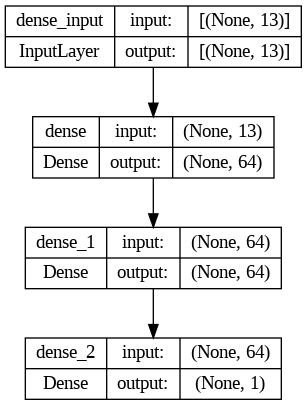

In [5]:
utils.plot_model(model, show_shapes=True)

In [6]:
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

### (3) 모델 학습

In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=40, validation_split=0.2)

Epoch 1/40
11/11 [==============================] - 1s 26ms/step - loss: 373.6704 - mae: 16.5782 - val_loss: 335.4134 - val_mae: 16.5203
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 171.2150 - mae: 10.1732 - val_loss: 131.2875 - val_mae: 9.2072
Epoch 3/40
11/11 [==============================] - 0s 8ms/step - loss: 89.5492 - mae: 7.0757 - val_loss: 265.3918 - val_mae: 14.0034
Epoch 4/40
11/11 [==============================] - 0s 7ms/step - loss: 89.4168 - mae: 6.9332 - val_loss: 78.2405 - val_mae: 6.7943
Epoch 5/40
11/11 [==============================] - 0s 6ms/step - loss: 50.1568 - mae: 4.9184 - val_loss: 24.1052 - val_mae: 3.5719
Epoch 6/40
11/11 [==============================] - 0s 7ms/step - loss: 16.8486 - mae: 2.9913 - val_loss: 224.5549 - val_mae: 10.4145
Epoch 7/40
11/11 [==============================] - 0s 8ms/step - loss: 91.3761 - mae: 6.2714 - val_loss: 21.4858 - val_mae: 3.6249
Epoch 8/40
11/11 [==============================] - 0s 6ms/step 

<ipython-input-8-f8d17c8aac0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


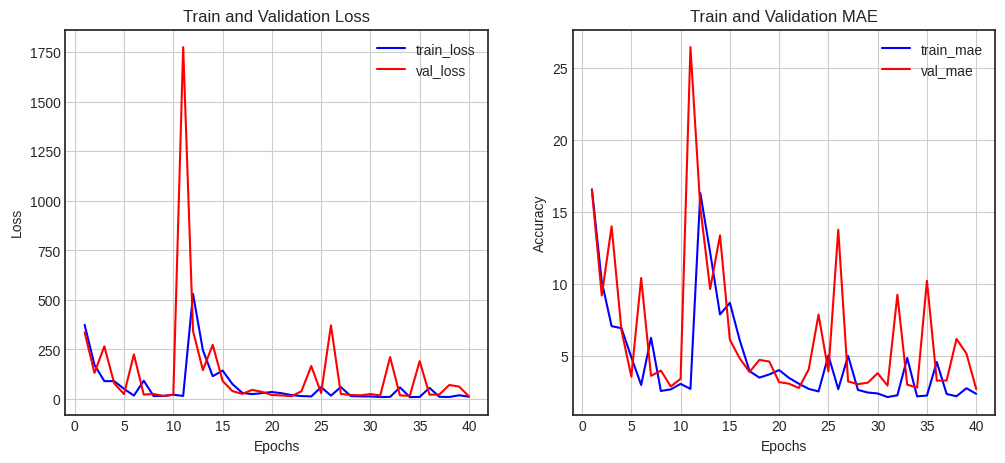

In [8]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 배치 사이즈 추가
history = model.fit(train_data, train_labels, epochs=40, batch_size=64,validation_split=0.2)

Epoch 1/40
6/6 [==============================] - 0s 37ms/step - loss: 7.1543 - mae: 1.9176 - val_loss: 15.2349 - val_mae: 3.0845
Epoch 2/40
6/6 [==============================] - 0s 16ms/step - loss: 7.4665 - mae: 2.0577 - val_loss: 13.9692 - val_mae: 2.8039
Epoch 3/40
6/6 [==============================] - 0s 14ms/step - loss: 6.6126 - mae: 1.8885 - val_loss: 13.6925 - val_mae: 2.7450
Epoch 4/40
6/6 [==============================] - 0s 16ms/step - loss: 7.8645 - mae: 1.9499 - val_loss: 12.8140 - val_mae: 2.6752
Epoch 5/40
6/6 [==============================] - 0s 17ms/step - loss: 7.0963 - mae: 1.8827 - val_loss: 14.8850 - val_mae: 2.8454
Epoch 6/40
6/6 [==============================] - 0s 26ms/step - loss: 8.6318 - mae: 2.0738 - val_loss: 22.6401 - val_mae: 3.4545
Epoch 7/40
6/6 [==============================] - 0s 31ms/step - loss: 11.5369 - mae: 2.3518 - val_loss: 13.0889 - val_mae: 2.7678
Epoch 8/40
6/6 [==============================] - 0s 16ms/step - loss: 6.6866 - mae: 1.87

<ipython-input-10-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


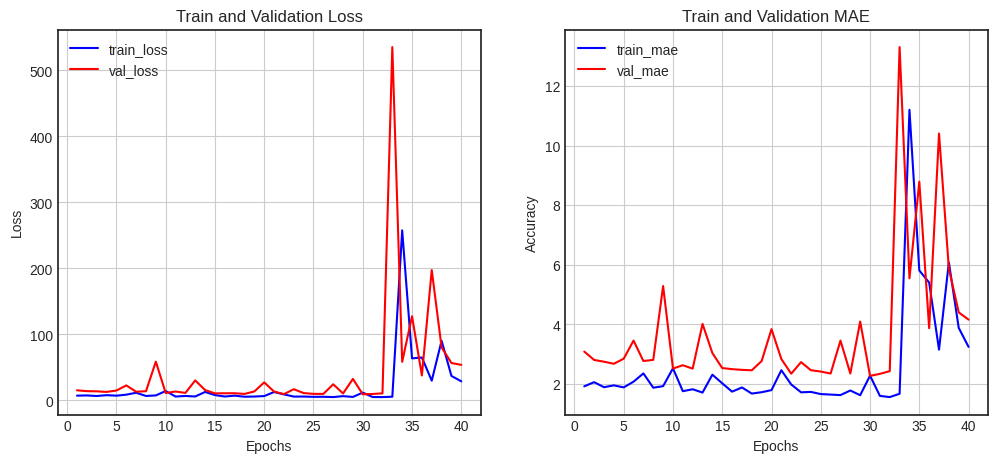

In [10]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [11]:
model.compile(loss='mse', optimizer='rmsprop', metrics='mae')
history = model.fit(train_data, train_labels, epochs=40, batch_size=64,validation_split=0.2)

Epoch 1/40
6/6 [==============================] - 2s 119ms/step - loss: 27.1258 - mae: 3.2151 - val_loss: 47.2762 - val_mae: 3.7847
Epoch 2/40
6/6 [==============================] - 0s 25ms/step - loss: 24.5565 - mae: 2.9393 - val_loss: 44.6034 - val_mae: 3.6609
Epoch 3/40
6/6 [==============================] - 0s 30ms/step - loss: 23.4901 - mae: 2.8253 - val_loss: 42.7009 - val_mae: 3.6194
Epoch 4/40
6/6 [==============================] - 0s 21ms/step - loss: 22.8854 - mae: 2.7579 - val_loss: 41.4924 - val_mae: 3.5677
Epoch 5/40
6/6 [==============================] - 0s 27ms/step - loss: 22.4998 - mae: 2.7141 - val_loss: 40.4484 - val_mae: 3.5248
Epoch 6/40
6/6 [==============================] - 0s 24ms/step - loss: 22.1504 - mae: 2.6758 - val_loss: 39.3629 - val_mae: 3.5115
Epoch 7/40
6/6 [==============================] - 0s 35ms/step - loss: 21.8329 - mae: 2.6555 - val_loss: 38.2776 - val_mae: 3.5199
Epoch 8/40
6/6 [==============================] - 0s 31ms/step - loss: 21.4963 - m

<ipython-input-12-f8d17c8aac0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


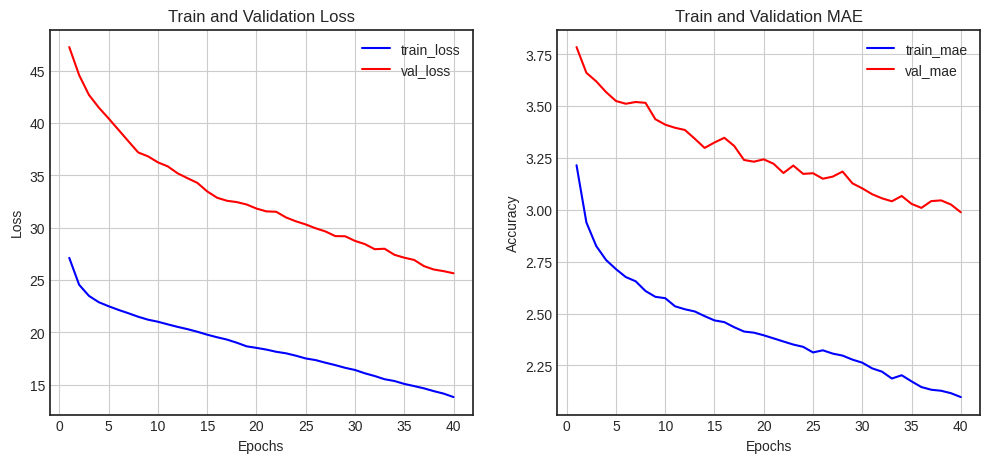

In [12]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
model.compile(loss='mse', optimizer='adam', metrics='mae')
history = model.fit(train_data, train_labels, epochs=40, batch_size=64,validation_split=0.2)

Epoch 1/40
6/6 [==============================] - 1s 43ms/step - loss: 13.6558 - mae: 2.1113 - val_loss: 25.2491 - val_mae: 2.9768
Epoch 2/40
6/6 [==============================] - 0s 12ms/step - loss: 13.2335 - mae: 2.0768 - val_loss: 25.0691 - val_mae: 2.9597
Epoch 3/40
6/6 [==============================] - 0s 13ms/step - loss: 13.0080 - mae: 2.0628 - val_loss: 24.7450 - val_mae: 2.9662
Epoch 4/40
6/6 [==============================] - 0s 12ms/step - loss: 12.7832 - mae: 2.0489 - val_loss: 24.3800 - val_mae: 3.0072
Epoch 5/40
6/6 [==============================] - 0s 13ms/step - loss: 12.6590 - mae: 2.0394 - val_loss: 24.2143 - val_mae: 3.0281
Epoch 6/40
6/6 [==============================] - 0s 11ms/step - loss: 12.5433 - mae: 2.0325 - val_loss: 24.1513 - val_mae: 3.0250
Epoch 7/40
6/6 [==============================] - 0s 12ms/step - loss: 12.4549 - mae: 2.0242 - val_loss: 24.0255 - val_mae: 3.0286
Epoch 8/40
6/6 [==============================] - 0s 13ms/step - loss: 12.3717 - ma

<ipython-input-14-f8d17c8aac0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


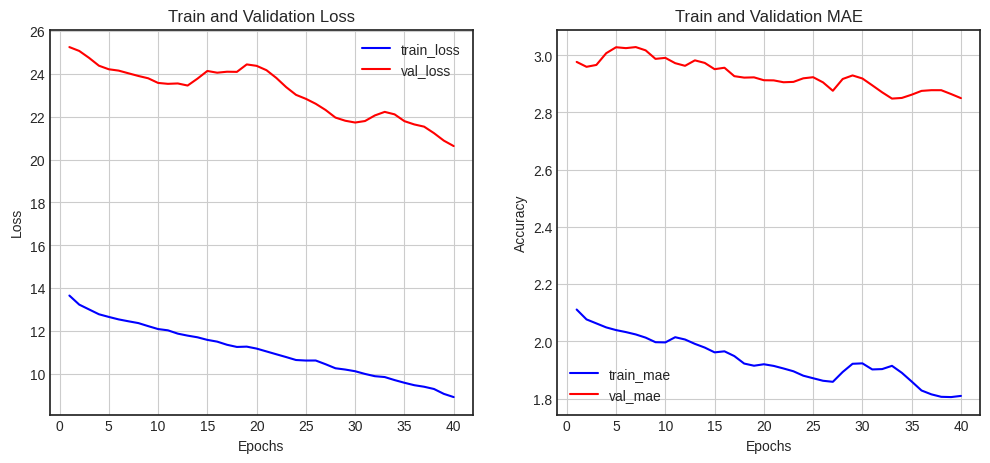

In [14]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- SGD로 학습한 결과가 가장 좋다는 것을 확인할 수 있다.

In [15]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
history = model.fit(train_data, train_labels, epochs=40, batch_size=64,validation_split=0.2)

Epoch 1/40
6/6 [==============================] - 1s 41ms/step - loss: 25.4469 - mae: 3.0390 - val_loss: 64.9955 - val_mae: 5.8149
Epoch 2/40
6/6 [==============================] - 0s 9ms/step - loss: 26.2927 - mae: 3.4197 - val_loss: 83.0068 - val_mae: 7.1766
Epoch 3/40
6/6 [==============================] - 0s 8ms/step - loss: 45.0811 - mae: 4.6678 - val_loss: 90.2340 - val_mae: 7.0729
Epoch 4/40
6/6 [==============================] - 0s 9ms/step - loss: 42.1942 - mae: 4.3749 - val_loss: 72.1675 - val_mae: 6.1269
Epoch 5/40
6/6 [==============================] - 0s 10ms/step - loss: 44.2075 - mae: 4.4660 - val_loss: 68.8610 - val_mae: 5.7955
Epoch 6/40
6/6 [==============================] - 0s 10ms/step - loss: 24.8899 - mae: 3.2982 - val_loss: 20.6749 - val_mae: 3.1524
Epoch 7/40
6/6 [==============================] - 0s 9ms/step - loss: 11.8988 - mae: 2.4895 - val_loss: 27.2998 - val_mae: 3.4646
Epoch 8/40
6/6 [==============================] - 0s 15ms/step - loss: 12.5728 - mae: 2

<ipython-input-16-f8d17c8aac0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


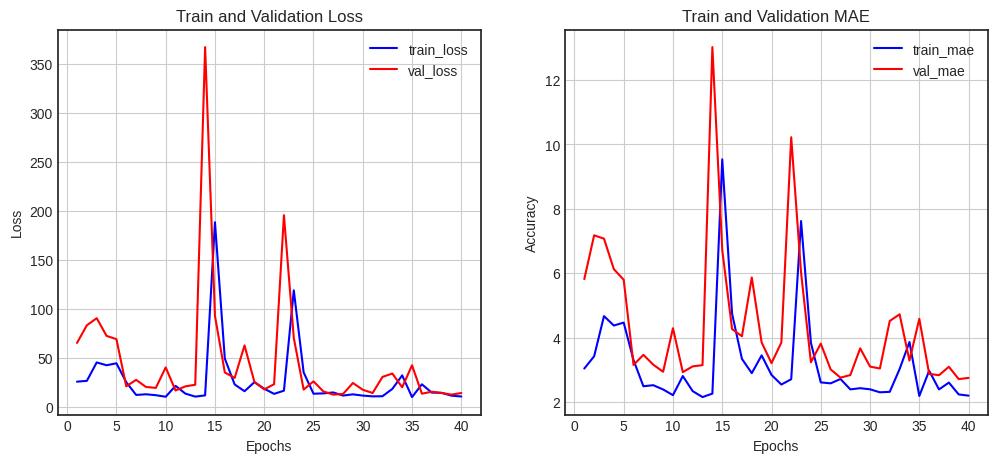

In [16]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### (4) 모델 평가 및 예측

In [17]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 25.2630 - mae: 3.3888


[25.262996673583984, 3.388798713684082]

In [18]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 25.2630 - mae: 3.3888
3.388798713684082


In [19]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(404, 13) (404,)
(102, 13) (102,)


In [20]:
print(type(train_data))
print(type(test_data))
print(type(train_labels))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


4/4 [==============================] - 0s 3ms/step


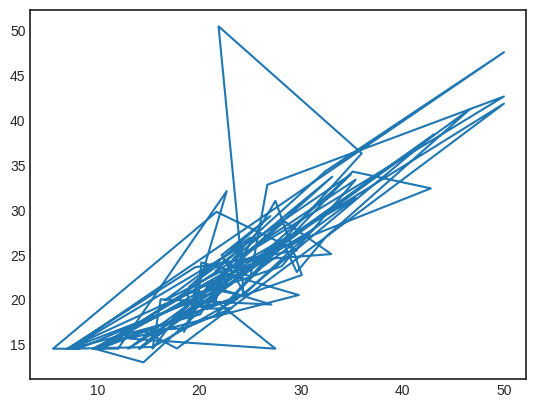

In [21]:
result = model.predict(test_data)

plt.plot(test_labels, result)
plt.show()

In [22]:
print(result[:10])

[[14.511425]
 [19.534245]
 [21.401464]
 [29.28275 ]
 [24.942947]
 [20.644024]
 [27.796616]
 [22.210121]
 [18.970901]
 [19.02566 ]]


In [23]:
model.layers

In [24]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [25]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[ 2.46026903e-01 -7.68904984e-02 -9.05992091e-02 -3.52792293e-01
  -9.48188305e-02 -5.75397789e-01  2.11199578e-02  3.73630482e-03
   5.80648370e-02  3.84876907e-01  2.39412915e-02 -7.38832280e-02
  -4.62468900e-02  5.62705565e-03  2.76176512e-01 -1.33839324e-01
  -1.64856747e-01  2.09058851e-01  1.83300287e-01  3.77285123e-01
   2.13464394e-01  3.56306881e-02 -8.10072243e-01  2.36709133e-01
   2.04879493e-01 -1.03895113e-01  9.08575237e-01  1.00212836e+00
   2.56499916e-01 -2.61555076e-01 -2.77184784e-01  2.01033764e-02
  -7.66366720e-03  9.86364707e-02  3.39057624e-01 -1.33590832e-01
   4.77582142e-02 -1.00274920e-01 -1.20735383e-02  1.84248775e-01
  -3.88730973e-01 -1.28911987e-01 -2.30086684e-01 -1.92512214e-01
   3.27796251e-01  6.74887374e-02  1.68797657e-01  6.66413784e-01
  -1.07184261e-01  2.03708023e-01 -4.47673023e-01  2.33644322e-01
   1.61668688e-01 -4.85368848e-01 -2.60499846e-02  3.79271805e-01
  -7.40234181e-02  6.02525659e-02  8.56724828e-02  1.63630009e-01
  -3.79306

## 2. Reuters 딥러닝 모델


- 로이터 뉴스 기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기사의 주제로 46개의 레이블
⇒ 다중 분류 문제
___

이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있음. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용

### (1) 데이터 로드 및 전처리

**전처리**
- 텍스트 데이터를 벡터로 변환
- 일반적으로 자주 사용되는 원핫 인코딩을 이용하여 텍스트를 0과 1의 벡터로 변환
- 뉴스 주제인 레이블도 원핫인코딩을 이용해 변환 수정

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [27]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data_full,
                                                                  train_labels_full,
                                                                  test_size=0.25,
                                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력
print('훈련 데이터: ',len(train_data))
print('검증 데이터: ',len(val_data))
print('테스트 데이터: ',len(test_data))
print('레이블 종류: ',len(set(train_labels)))

훈련 데이터:  6736
검증 데이터:  2246
테스트 데이터:  2246
레이블 종류:  46


In [28]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [29]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i,d] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

### (2) 모델 구성 및 컴파일

In [30]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Dense(128, activation='relu',input_shape=(10000, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

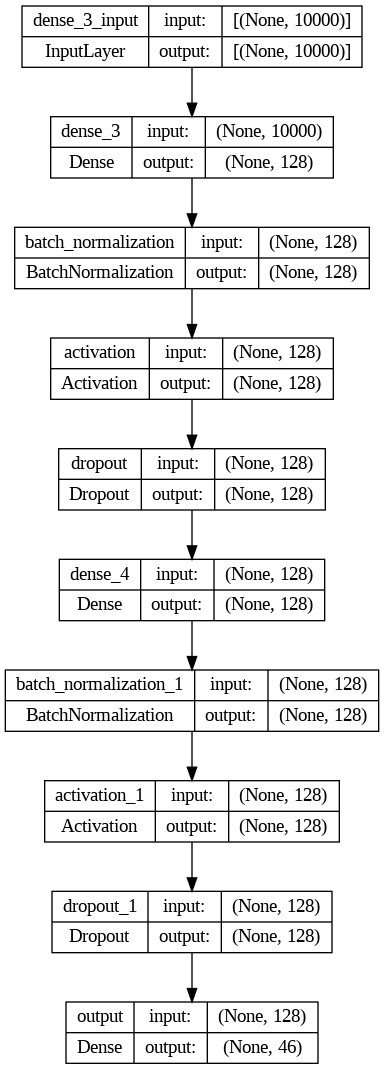

In [31]:
utils.plot_model(model, show_shapes=True)

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### (3) 모델 학습

In [33]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(6736, 10000) (6736, 46)
(2246, 10000) (2246, 46)
(2246, 10000) (2246, 46)


In [34]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
14/14 [==============================] - 3s 144ms/step - loss: 3.1140 - accuracy: 0.3412 - val_loss: 3.3705 - val_accuracy: 0.6220
Epoch 2/40
14/14 [==============================] - 2s 118ms/step - loss: 1.9918 - accuracy: 0.5818 - val_loss: 3.2236 - val_accuracy: 0.6692
Epoch 3/40
14/14 [==============================] - 1s 104ms/step - loss: 1.5959 - accuracy: 0.6456 - val_loss: 3.0886 - val_accuracy: 0.6883
Epoch 4/40
14/14 [==============================] - 2s 177ms/step - loss: 1.3588 - accuracy: 0.6937 - val_loss: 2.9975 - val_accuracy: 0.6995
Epoch 5/40
14/14 [==============================] - 2s 141ms/step - loss: 1.1969 - accuracy: 0.7222 - val_loss: 2.9440 - val_accuracy: 0.7093
Epoch 6/40
14/14 [==============================] - 2s 113ms/step - loss: 1.0927 - accuracy: 0.7372 - val_loss: 2.9177 - val_accuracy: 0.7204
Epoch 7/40
14/14 [==============================] - 2s 111ms/step - loss: 0.9955 - accuracy: 0.7605 - val_loss: 2.9101 - val_accuracy: 0.7271
Epoch 

<ipython-input-35-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


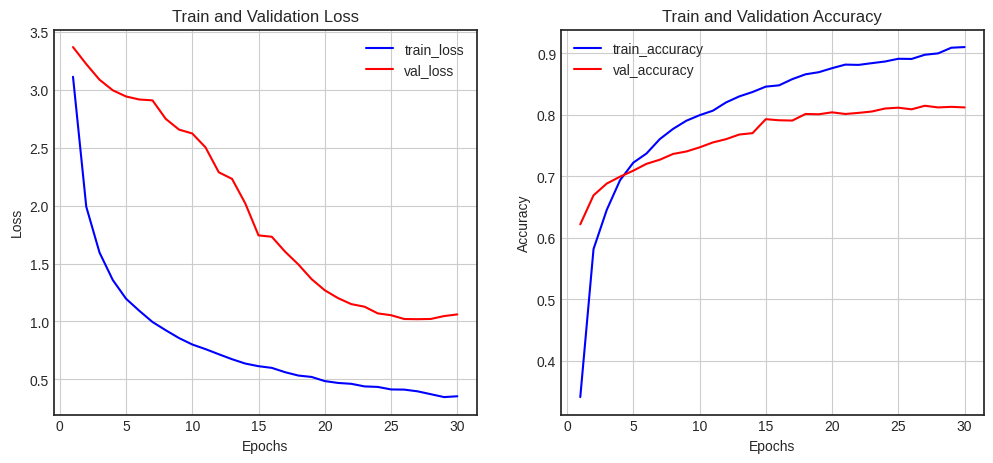

In [35]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### (4) 모델 평가 및 예측

In [36]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 10ms/step - loss: 1.1114 - accuracy: 0.7939


[1.1114438772201538, 0.7938557267189026]

In [37]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

71/71 [==============================] - 1s 6ms/step
(2246, 46)
[1.29655775e-04 4.18221753e-04 1.85814934e-04 9.74526346e-01
 9.63255391e-03 1.96249370e-04 1.68227503e-04 9.67509768e-05
 9.19034239e-04 2.27224227e-04 9.34177515e-05 2.55958061e-03
 1.44944162e-04 1.51157103e-04 1.12440925e-04 1.46715378e-04
 7.76022614e-04 1.17989905e-04 3.39272898e-04 1.21500902e-03
 2.36806506e-03 1.24298548e-03 1.08486536e-04 5.73999947e-04
 1.90145220e-04 4.44121892e-04 4.96037137e-05 7.11223838e-05
 8.89626899e-05 2.33284722e-04 6.02267741e-04 2.17959328e-04
 8.07916003e-05 1.68668150e-04 1.26015206e-04 1.12413371e-04
 3.02846456e-04 7.52093038e-05 1.51513013e-04 6.37330813e-05
 5.31314690e-05 7.03207406e-05 1.29044420e-04 1.86862497e-04
 5.96729187e-05 7.21858523e-05]


In [38]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.62      0.79      0.70       105
           2       0.84      0.80      0.82        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.65      0.74      0.69        38
           9       0.72      0.72      0.72        25
          10       0.96      0.83      0.89        30
          11       0.63      0.81      0.71        83
          12       0.38      0.23      0.29        13
          13       0.54      0.73      0.62        37
          14       0.00      0.00      0.00         2
          15       0.67      0.22      0.33         9
          16       0.72      0.74      0.73        99
          17       0.40    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. CIFAR10 딥러닝 모델

- 32x32픽셀의 60,000개 컬러이미지가 포함
- 각 이미지는 10개의 클래스로 라벨링
- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋



### (1) 데이터 로드 및 전처리

- 32x32x3 크기의 이미지를 3072 크기로 변형 (1차원으로 변형)
- 0 ~ 255 사이의 값을 가지는 이미지를 0 ~ 1 사이의 값으로 변환

In [39]:
from tensorflow.keras.datasets import cifar10

In [40]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  test_size=0.25,
                                                  random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (37500, 32, 32, 3) 레이블: (37500, 1)
검증 데이터: (12500, 32, 32, 3) 레이블: (12500, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [41]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [42]:
print(y_train_full[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


<ipython-input-43-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


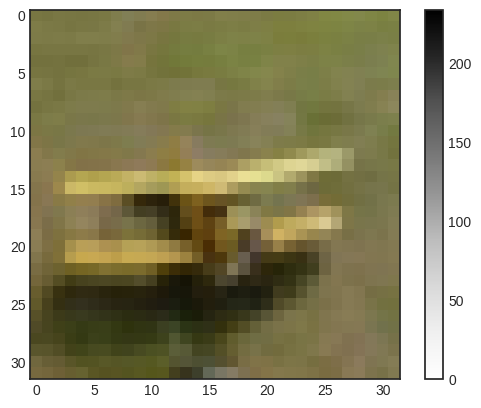

In [43]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [44]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [45]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_val = x_val.reshape(x_val.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 3072)
(12500, 3072)
(10000, 3072)


In [46]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [47]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

### (2) 모델 구성 및 컴파일

In [48]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                      

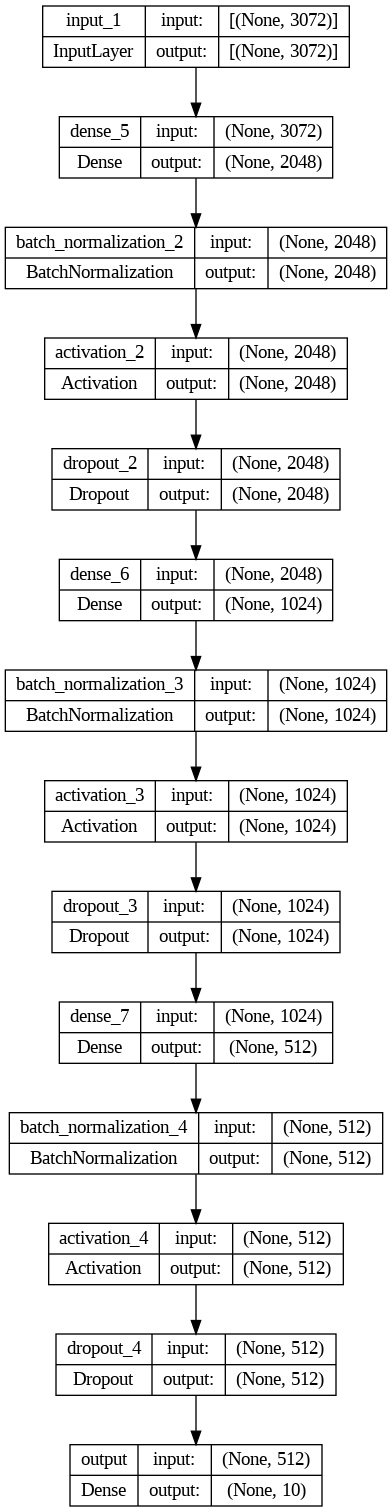

In [49]:
utils.plot_model(model, show_shapes=True)

In [50]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### (3) 모델 학습

In [51]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(37500, 3072) (37500, 10)
(12500, 3072) (12500, 10)
(10000, 3072) (10000, 10)


In [52]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
74/74 [==============================] - 57s 751ms/step - loss: 2.4690 - accuracy: 0.2353 - val_loss: 9.5299 - val_accuracy: 0.1430
Epoch 2/40
74/74 [==============================] - 49s 663ms/step - loss: 2.0934 - accuracy: 0.3017 - val_loss: 3.0218 - val_accuracy: 0.2600
Epoch 3/40
74/74 [==============================] - 49s 663ms/step - loss: 1.8969 - accuracy: 0.3486 - val_loss: 1.9159 - val_accuracy: 0.3209
Epoch 4/40
74/74 [==============================] - 49s 660ms/step - loss: 1.7825 - accuracy: 0.3777 - val_loss: 1.8709 - val_accuracy: 0.3353
Epoch 5/40
74/74 [==============================] - 54s 733ms/step - loss: 1.7107 - accuracy: 0.3976 - val_loss: 1.7746 - val_accuracy: 0.3946
Epoch 6/40
74/74 [==============================] - 51s 694ms/step - loss: 1.6610 - accuracy: 0.4133 - val_loss: 1.6960 - val_accuracy: 0.3926
Epoch 7/40
74/74 [==============================] - 54s 730ms/step - loss: 1.6409 - accuracy: 0.4206 - val_loss: 1.7508 - val_accuracy: 0.3958

<ipython-input-53-a8a59d4010a8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


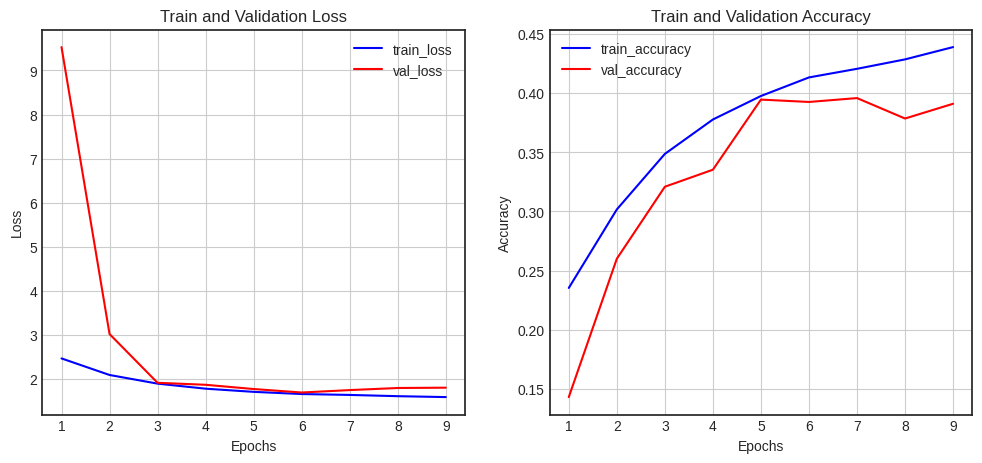

In [53]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### (4) 모델 평가 및 예측

In [54]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.6962 - accuracy: 0.3906


[1.6961966753005981, 0.3905999958515167]

- 위에서는 Dense layer만 가지고 모델학습을 했는데, 이미지 데이터는 그에 적합한 기법을 사용해야 한다.\
따라서 위에서는 성능이 낮게 나온 것으로, 이미지 데이터를 잘 처리하려면 CNN 계열의 성능이 좋은 아키텍처를 거쳐야 한다.

## 4. 회고
(1) 보스턴 주택 가격 예측 모델
- 처음 보스턴 주택 가격 예측 모델을 구성할 때, 마지막 레이어의 활성화함수를 'softmax'로 지정했었다. 그리고 batch_size를 지정하지 않은 상태로 학습을 시켰을 때 loss값이 굉장히 좋지 않게 나왔었는데, 활성화함수 지정을 지우고, 배치사이즈를 지정해주자 괜찮은 형태로 변하게 되었다.
배치사이즈는 너무 높게 하면 오히려 성능이 떨어지는 것 같다.
 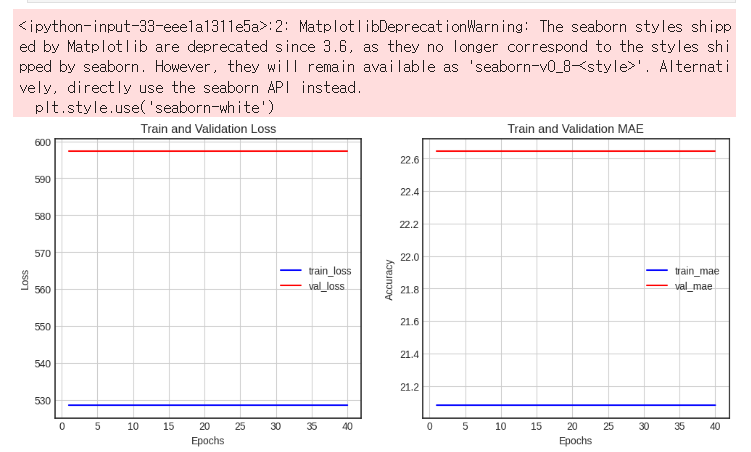

- 밸리데이션 세트를 만들 때 val_data ,val_labels를 스플릿 메서드를 사용해 나누려했는데 그러면 'val_loss'에서 오류가 났다. 아직도 이 부분은 잘 모르겠어서 랜덤시드를 지정하지 않은 상태로 스플릿을 진행했다.
- plot을 보는 건 의미가 없었던 것 같다.
- 옵티마이저 설정할 때 SGD의 성능이 가장 안 좋을 줄 알았는데 가장 좋았다. 무조건 적으로 좋은 옵티마이저가 있는 것이 아니라 모델에 따라 다르다는 것을 알게 되었다.

(2) CIFAR10 데이터 분류
- 데이터 라벨이 크기가 1인데 모델은 10으로 결과값이 나오게 되어있어서 크기가 맞지 않았다. 라벨의 크기를 10으로 맞춰줘야 하는데 허둥거리다가 뒤늦게 원핫인코딩에 대해 떠올렸다. 2번에서도 한 건데 아직 따라가기에 급급한 것 같다.
처음 시작할 땐 너무 막막하고 어려웠는데 끝까지 완수하게 되어 기쁘다.


(3) 이 프로젝트로 배우게 된 것
- 노드 학습을 할 땐 모델을 구성하는 게 정말 어렵게 느껴졌고 코드로 구현하는 것이 이해가 안되서 원리만 이해하고 넘어갔었다. 프로젝트를 하면서 코드를 알아야 하기 때문에 다시 학습을 하게 되었는데, 천천히 다시 보니 어떻게 하는지 알게 되었고, 딥러닝이 어렵긴 하지만 반복해서 보면 이해할 수 있다는 것을 알게 되었다. 
- 케라스 책을 아직 나가지 않았는데 자료 검색을 하다가 위 예제들이 케라스 책에 나온다는 것을 알게 되었다.
  책에서는 다른 방법을 제시하는 경우도 있어서 신기했고, 아직 딥러닝에 대해 배울게 산더미구나 싶었다. 앞으로 배울 내용들도, 지금까지 배운 내용들도 머릿속에 잘 학습되었으면 좋겠다.

## 5. Reference

- 케라스 창시자에게 배우는 딥러닝[프랑소와 솔레]
- model.evaluate (https://wikidocs.net/178802)
- 데이터 재배열 (https://marinadb.tistory.com/26)